In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.stats import zscore
from sklearn.metrics import silhouette_score,classification_report
import pandas as pd

pd.options.display.max_columns=1000

In [2]:
import pandas as pd
import pycaret
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
newdf = df[(df.Attrition == "Yes")]
for i in range(4):
    df =df.append(newdf)
    
df["Attrition"].value_counts()

No     1233
Yes    1185
Name: Attrition, dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2418.0,35.623656,9.487477,18.0,29.00,34.0,42.0,60.0
DailyRate,2418.0,782.050455,403.350504,102.0,430.25,754.5,1133.5,1499.0
DistanceFromHome,2418.0,9.757237,8.266969,1.0,2.00,8.0,15.0,29.0
Education,2418.0,2.884202,1.017752,1.0,2.00,3.0,4.0,5.0
EmployeeCount,2418.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,2418.0,1019.172870,593.343315,1.0,500.25,1017.5,1528.5,2068.0
EnvironmentSatisfaction,2418.0,2.620761,1.129812,1.0,2.00,3.0,4.0,4.0
HourlyRate,2418.0,65.766749,20.223804,30.0,49.00,66.0,84.0,100.0
JobInvolvement,2418.0,2.647229,0.742940,1.0,2.00,3.0,3.0,4.0
JobLevel,2418.0,1.896609,1.064753,1.0,1.00,2.0,2.0,5.0


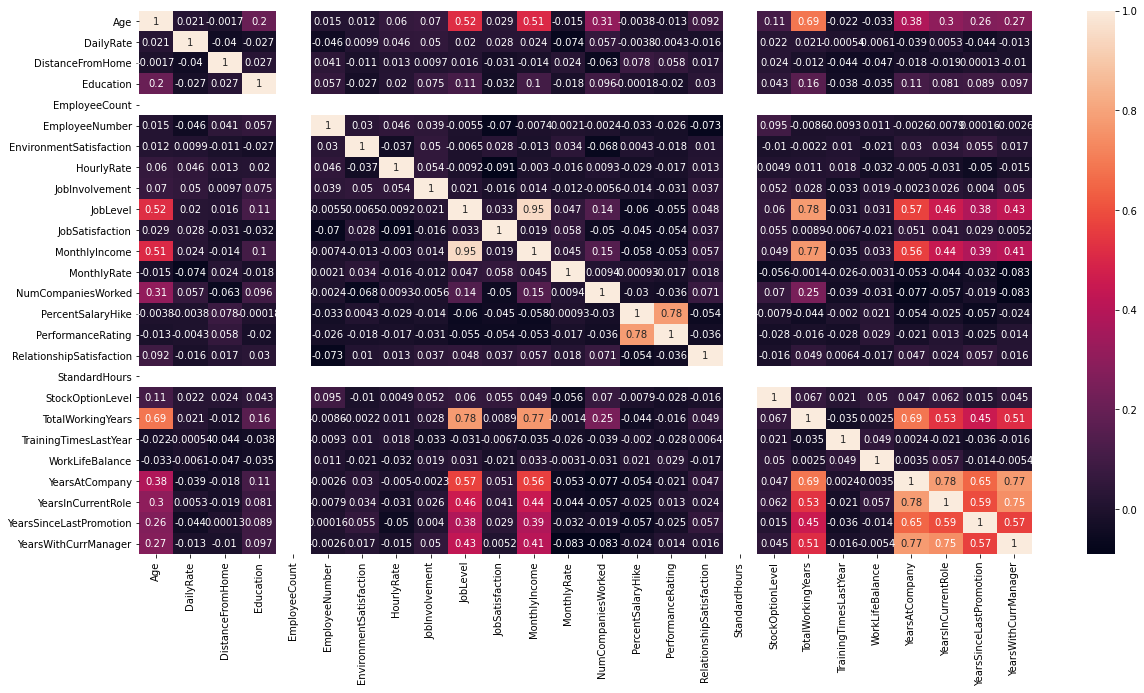

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [6]:
df.drop(columns=['EmployeeCount','StandardHours'] , inplace=True)

In [7]:
df_num=df.select_dtypes(exclude='object')
df_num_scaled=df_num.apply(zscore)

# encode categorical data
df_cat=df.select_dtypes(include='object')
df_cat_dummy=pd.get_dummies(df_cat, drop_first=True)


# concat numerical & categorical data
xscaled=pd.concat([df_num_scaled,df_cat_dummy] , axis=1).reset_index(drop=True)
xscaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.566795,0.793394,-1.059524,-0.868959,-1.716348,-0.549551,1.396329,0.474929,0.097124,1.231863,0.037014,0.709312,2.026855,-1.125767,-0.427755,-1.517694,-0.799101,-0.271967,-2.137713,-2.287369,-0.044459,0.082799,-0.655102,0.397336,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1.410186,-1.247437,-0.212605,-1.851719,-1.714662,0.335735,-0.235749,-0.871353,0.097124,-0.561961,-0.159220,1.468803,-0.696535,2.117407,2.337785,1.212123,0.360003,-0.011680,0.210760,0.371058,0.609048,0.937176,-0.342051,0.975237,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.145100,1.465405,-0.938535,-0.868959,-1.711291,1.221022,1.297415,-0.871353,-0.842255,0.334951,-0.850472,-1.680960,1.248744,-0.044709,-0.427755,-0.607755,-0.799101,-0.402110,0.210760,0.371058,-1.024720,-1.056370,-0.655102,-1.047415,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,-0.276596,1.512520,-0.817547,1.096562,-1.709605,1.221022,-0.483033,0.474929,-0.842255,0.334951,-0.664244,1.224221,-0.696535,-1.125767,-0.427755,0.302184,-0.799101,-0.271967,0.210760,0.371058,0.282295,0.937176,0.284050,-1.047415,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-0.909139,-0.473757,-0.938535,-1.851719,-1.706233,-1.434838,-1.274344,0.474929,-0.842255,-0.561961,-0.537135,0.310956,2.415911,-0.855502,-0.427755,1.212123,0.360003,-0.532254,0.210760,0.371058,-0.697967,-0.486785,-0.029001,-0.469514,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [8]:
xscaled["Attrition_Yes"].value_counts()

0    1233
1    1185
Name: Attrition_Yes, dtype: int64

In [9]:
X = xscaled.drop(["Attrition_Yes"],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

y = xscaled["Attrition_Yes"]

# RidgeClassifier balanced Dataset

Accuracy: 0.7796143250688705


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.79      0.78      0.78       368\n'
 '           1       0.77      0.78      0.78       358\n'
 '\n'
 '    accuracy                           0.78       726\n'
 '   macro avg       0.78      0.78      0.78       726\n'
 'weighted avg       0.78      0.78      0.78       726\n')


[[286  82]
 [ 78 280]]




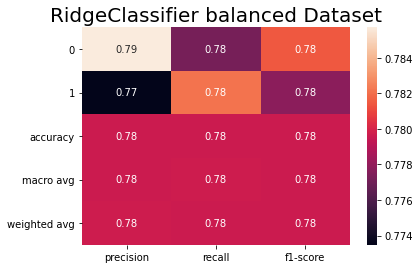

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4176,
                solver='auto', tol=0.001)
rc.fit(X_train,y_train)

y_pred=rc.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)

print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RidgeClassifier balanced Dataset",fontsize=20)

plt.savefig("RidgeClassifier Imbalanced Dataset.jpg",bbox_inches="tight")

In [12]:
from sklearn.model_selection import cross_val_score
f1 = cross_val_score(rc, X, y, scoring='f1', cv = 10)
print(f1)

[0.78861789 0.75949367 0.7804878  0.75949367 0.78838174 0.77310924
 0.76229508 0.74193548 0.75518672 0.75806452]


# RandomForestClassifier balanced Dataset

Accuracy: 0.9807162534435262


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.98      0.99      0.98       360\n'
 '           1       0.99      0.98      0.98       366\n'
 '\n'
 '    accuracy                           0.98       726\n'
 '   macro avg       0.98      0.98      0.98       726\n'
 'weighted avg       0.98      0.98      0.98       726\n')


[[355   5]
 [  9 357]]




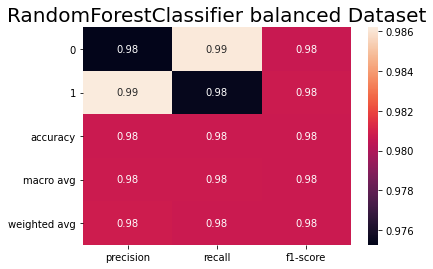

In [13]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4176,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf = classification_report(y_pred, y_test)
from pprint import pprint 
print("\n")
pprint(cf)
from sklearn.metrics import classification_report, confusion_matrix
cm=  confusion_matrix(y_pred, y_test)
print("\n")
print(cm)

print("\n")
cf = classification_report(y_pred, y_test, output_dict=True)
P1 = sns.heatmap(pd.DataFrame(cf).iloc[:-1, :].T, annot=True).set_title("RandomForestClassifier balanced Dataset",fontsize=20)

plt.savefig("RandomForestClassifier Imbalanced Dataset.jpg",bbox_inches="tight")

In [14]:
f1 = cross_val_score(clf, X, y, scoring='f1', cv = 10)
print(f1)

[0.87179487 0.98755187 0.98755187 0.99166667 0.97942387 0.97520661
 0.97520661 0.98333333 0.9874477  0.92913386]


In [15]:
print("F1 of Model with Cross Validation is:",f1.mean() * 100)

F1 of Model with Cross Validation is: 96.68317254700446


In [16]:
f1 = cross_val_score(clf, X_test, y_test, scoring='f1', cv = 10)
print(f1)

[0.90666667 0.91666667 0.86956522 0.94594595 0.88571429 0.94871795
 0.84210526 0.95890411 0.87323944 0.88571429]


In [17]:
print("F1 of Model with Cross Validation (Test data) is:",f1.mean() * 100)

F1 of Model with Cross Validation (Test data) is: 90.33239826183758
